## **Cournot competetion and the expansion of firms in the economy** 

When studying oligopolies, a type of monopolistic competition is called Cournot competition. In the Cournot model firms compete in quantities of output. 

In this assignment we want to analyze what happens when two firms have an output competition. 
For simplicity, we assume constant marginal cost (MC) for both firms. 

The price is determined by the output produced by the two firms together, via the inverse demand function. They choose their output quantity simultaneously. 

Furthermore we are assuming a linear demand curve. 


Imports

In [2]:
import numpy as np
from scipy import optimize
from sympy import solve
import sympy as sm
import matplotlib.pyplot as plt  # This line was missing
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

## Model description

In this assignment, we will be analyzing a Cournot duopoly. We assume, that both firms follow a linear demand curve given by: $P = P(Q) = m \cdot (q_1 + q_2) + b$, where m is the parameter for the slope of the price functions and b is the intercept of the price functions.

The costs for the firms are given by: $C_1 = c \cdot q_1$, and $C_2 = c \cdot q_2. $

The profit for the two firms are given by:

$\pi_1 = P \cdot q_1 - C_1 = m \cdot q_1^2 + m \cdot q_1 \cdot q2 - c \cdot q_1 \\$
$\pi_2 = P \cdot q_2 - C_2 = m \cdot q_2^2 + m \cdot q_1 \cdot q2 - c \cdot q_2$


In a cournot duopoly firms want to mazimize profit. The equilibrium is present for $q_1$ and $q_2$ that satisfies the following;

argmax $\pi_1$ wrt. $q_1$, and argmax $\pi_2$ wrt. $q_2$.

If the two equations above are solved for respectively $q_1^*$ and $q_2^*$, we have the best response functions. The best response functions tells us what firm1 and firm2's optimal output will be for every possible output agent 2 can choose. The equilibrium is found by subsituting $q_2^*$ into $q_1^*$ and solving for $q_1^*$, getting the equilibrium output for firm 1. The same is done for firm 2 to find the equilibrium output for firm 2.  

**Defining the model in python**

In [3]:
#Define variables in sympy

p = sm.symbols("p") #Market price
q1 = sm.symbols("q1") #Output firm 1
q2 = sm.symbols("q2") #Output firm 2
c = sm.symbols("c") #Marginal profit
pi1 = sm.symbols("pi1") #Profit for firm 1
pi2 = sm.symbols("pi2") #Profit for firm 2
m = sm.symbols("m") #Parameter for the slope of the price function
b = sm.symbols("b") # Intercept of the price function
C1 = sm.symbols("C1") #Costs for firm 1
C2 = sm.symbols("C2") #Costs for firm 2
P = sm.symbols("P") #Demand function


#Define profit for firm 1
profit1 =  m*q1**2 + m*q1*q2 + b*q1 - c*q1

#Define profit for firm 2
profit2 =  m*q2**2 + m*q1*q2 + b*q2 - c*q2

display("Profit firm 1 =", profit1)
display("Profit firm 2 =", profit2)

'Profit firm 1 ='

b*q1 - c*q1 + m*q1**2 + m*q1*q2

'Profit firm 2 ='

b*q2 - c*q2 + m*q1*q2 + m*q2**2

**Best Response Functions and a Nash Equilibrium**

In Cournot the equilibrium exists when the two firms' best response functions intersect. Therefore, we find the expressions for the best response functions by taking the FOC of profit for each firm with respect to their output: $\frac{\partial \pi_n}{\partial q_n}$. Following this we find the best response by solving and isolating outputs.

In [4]:
#First order derivative of profit for firm 1 wrt. q1 
objective1 = sm.diff(profit1, q1)

#First order derivative of profit for firm 2 wrt. q2
objective2 = sm.diff(profit2, q2)

#To find the best response functions, we isolate q1* and q2*
BR1 = sm.solve(objective1, q1)[0] 
BR2 = sm.solve(objective2, q2)[0]

display("Best response function for firm 1 =", BR1)
display("Best response function for firm 2 =",BR2)


'Best response function for firm 1 ='

(-b + c - m*q2)/(2*m)

'Best response function for firm 2 ='

(-b + c - m*q1)/(2*m)

## Solving the model in python

A Nash Equilibrium in Cournot exists when both firms use their best reponse function. Graphically, this is where the two best response functions intersect.

To find the equilibirum, we assume we know the values of m, b and c. The equilibrium quantities, profits and price are found below for given values of m, b and c.

In [5]:
# Parameters
m_val, b_val, c_val = 2, 50, 110  # Example values for m, b, c

# Define the profit functions with simple overflow checks
def profit1(q1, q2):
    return -(m_val * q1**2 + m_val * q1 * q2 + b_val * q1 - c_val * q1)


def profit2(q2, q1):
    return -(m_val * q2**2 + m_val * q1 * q2 + b_val * q2 - c_val * q2)
 
# Define the best response functions using numerical optimization
def best_response1(q2):
    q1 = (-m_val * q2 - b_val + c_val) / (2 * m_val)
    return q1

def best_response2(q1):
    q2 = (-m_val * q1 - b_val + c_val) / (2 * m_val)  # Assuming similar structure
    return q2

# Define the function to find the equilibrium by minimizing the squared differences
def find_equilibrium(x):
    q1, q2 = x
    br1 = best_response1(q2)
    br2 = best_response2(q1)
    return (q1 - br1)**2 + (q2 - br2)**2


# Initial guess
initial_guess = [10, 10]  # Assuming 10 is the starting point

# Optimization to find the equilibrium. The bounds ensure that the quantities are non-negative. The minimizer is used, to find the values that minimze the squared differences.
result = minimize(find_equilibrium, initial_guess, bounds=[(0, None), (0, None)])

# Output the equilibrium quantities
q1_equilibrium, q2_equilibrium = result.x

# Find the price at the given parameters with the equilibrium quantities
equib_price = m_val*(q1_equilibrium+q2_equilibrium) + b_val

print("Equilibrium quantities:")
print("q1* =" , q1_equilibrium)
print("q2* =", q2_equilibrium)
#Output the profits
print("Profits:")
print("Profit Firm 1 =", profit1(q1_equilibrium, q2_equilibrium))
print("Profit Firm 2 =", profit2(q1_equilibrium, q2_equilibrium))
#Price at equilibrium
print("Price at equilibrium=", equib_price)

Equilibrium quantities:
q1* = 10.0
q2* = 10.0
Profits:
Profit Firm 1 = 200.0
Profit Firm 2 = 200.0
Price at equilibrium= 90.0


From the results above we see, that the quantities in the equilibirum is the same for the two firms. 
In the equilibirum the quantities are approx. 10 for each firm, and the price for each unit is approx. 90. This makes sense, since we are in a Cournot equilibirum and the firms faces the same demand and have the same marginal costs.



**Plotting the equilibrium**

Graphically we can show the equilibrium as the intersect between BR1 and BR2 in the plot below.

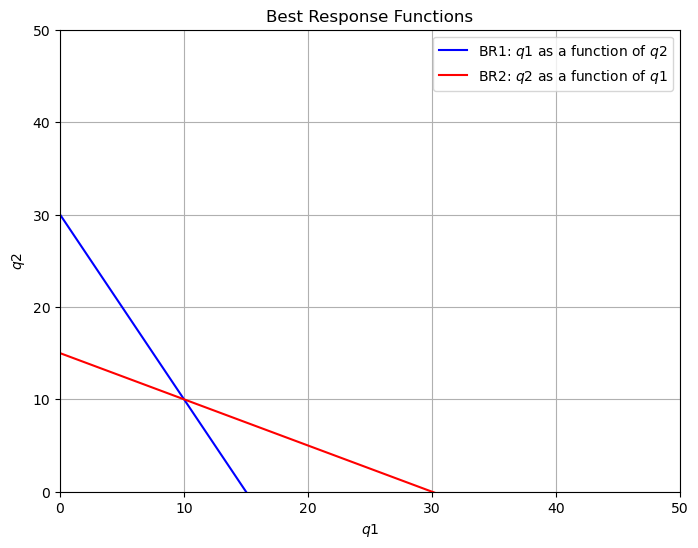

In [6]:

# Generate a range of quantities for plotting
q_range = np.linspace(0, 100, 400)

# Calculate best responses over the range
BR1_values = best_response1(q_range)  # q1 as a function of q2
BR2_values = best_response2(q_range)  # q2 as a function of q1

# Plotting
plt.figure(figsize=(8, 6))

# Plot BR within the range [0, 50]
plt.plot(BR1_values, q_range, label='BR1: $q1$ as a function of $q2$', color='blue')  # BR1 as function of q2
plt.plot(q_range, BR2_values, label='BR2: $q2$ as a function of $q1$', color='red')  # BR2 as function of q1
plt.xlabel("$q1$")
plt.ylabel('$q2$')
plt.title('Best Response Functions')
plt.legend()
plt.grid(True)
plt.xlim(0, 50)  # Set x-axis limits from 0 to 50
plt.ylim(0, 50)  # Set y-axis limits from 0 to 50
plt.show()




From above, we can see each firm's output decision influenced by the other's decisions, illustrating the strategic interdependence. 

The two best response functions intersact at q1* = q2* = 10, which corresponds to the solution found analytically. 

Each firm responds to quantity provided by the other firm. If firm 1 increase their production, the best response function for the other firm is to decrease their production. 



## Extension: A model with more firms**

To show what happens to Cournot competition when the competition increases, we solve the following problem below. We assume that all firms have the same cost function, and they all face the same demand. To illustrate what happens, we use the linear example:

The demand function; 

$D(q) = 70 - q $

The cost function:

$c = 10$

Which gives the profit function for firm 1:

$\pi = (70 - q1 - (N-1) \cdot q - 10) \cdot q1$

where N is the number of firms in the market. In this case, we iterate up to 100 firms.

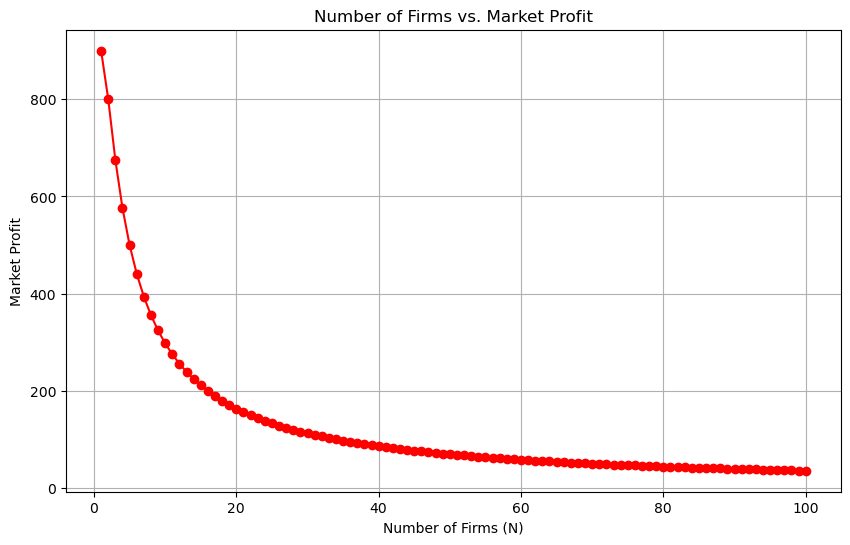

In [7]:
# Define the two new variable; N and q
q = sm.symbols('q') #aggregated output
N = sm.symbols('N') #Number of firms

# Define the profit function for one firm in a market with N competitors
profit1_N_firms = (70 - q1 - (N - 1) * q - 10) * q1

# First order derivative of the profit function with respect to q1 (objective function)
objectiveN = sm.diff(profit1_N_firms, q1)

# Arrays to store data points
N_values = []
market_profits = []

# Iterate from 1 to 100 firms.
for N_value in range(1, 101):
    # Assuming symmetry among firms, solve for q1
    BRN = sm.solve(objectiveN.subs({N: N_value, q: q1}), q1)
    
    if BRN:  # Check if a solution exists
        best_response = BRN[0]
        # Calculate the profit for one firm using its best response
        firm_profit = profit1_N_firms.subs({q1: best_response, q: best_response, N: N_value})
        
        # Aggregate market profit is N * individual firm's profit
        market_profit = N_value * firm_profit
        market_profits.append(market_profit)
        N_values.append(N_value)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, market_profits, marker='o', linestyle='-', color = "red")
plt.title('Number of Firms vs. Market Profit')
plt.xlabel('Number of Firms (N)')
plt.ylabel('Market Profit')
plt.grid(True)
plt.show()

The graph above shows, the negative relationship between market profit and the number of firms in a Cournot competition. 

In the graph it is evident, that the market profit decreases as the number of firms increases. This is consistent with our theoretical understanding of an oligopolistic market. As more firms enter the market, competition intensifies, which in turn lowers the price due to homoenous products. A lower price lowers the profit per marginal unit sold. In theory, the price will converge to production costs at increased competition. Hence, the profit converges towards 0. This shows, that the market converges towards perfect competition.

Below is a function showing a similar graph as above. However, there a 50 different values of marginal cost (c), normally distributed with a mean of 10 and standard deviation of 2. We assumes symmetry, such that all firms have the same marginal cost and cost function for a given marginal cost. The graph shows how a change in the marginal cost effects the market profits. Note: the function takes around 15 seconds to run.

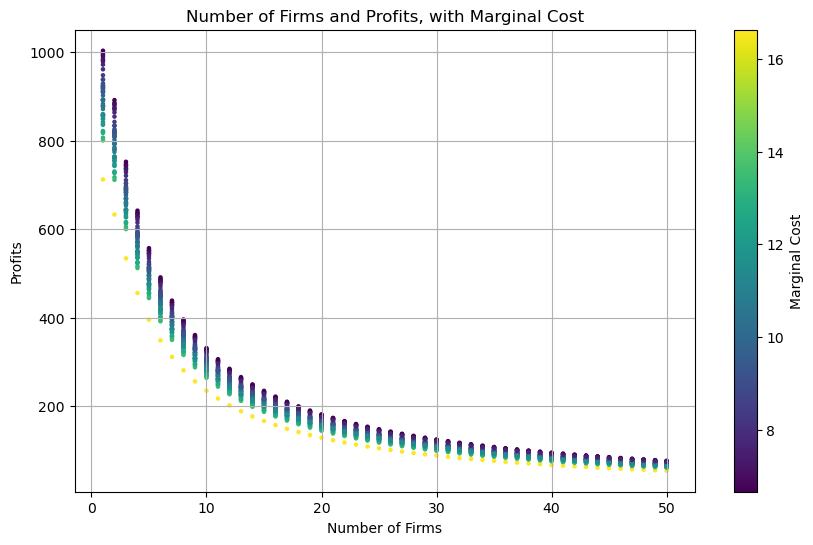

In [12]:
# Define symbols
q1 = sm.symbols('q1')
q = sm.symbols('q')
N = sm.symbols('N')
c = sm.symbols('c')

# Define the profit function for firm 1 in a market with N competitors
profit1_N_firms = (70 - q1 - (N - 1) * q - c) * q1

# First order derivative of the profit function with respect to q1
objectiveN = sm.diff(profit1_N_firms, q1)

# Arrays to store data points
N_values = []
market_profits = []
marginal_costs = []

np.random.seed(50)  # Set seed
c_values = np.random.normal(loc=10, scale=2, size=50)  # Generate 50 values from a normal distribution for the cost

for N_value in range(1, 51):  # Iterate from 1 to 50 firms
    for c_value in c_values:
        # Assuming symmetry among firms, solve for q1
        BRN = sm.solve(objectiveN.subs({N: N_value, q: q1, c: c_value}), q1)
        
        if BRN:  # Check if a solution exists
            best_response = BRN[0]
            # Calculate the profit for one firm using its best response
            firm_profit = profit1_N_firms.subs({q1: best_response, q: best_response, N: N_value, c: c_value})
            
            # Market profit is N * individual firm's profit
            market_profit = N_value * firm_profit
            market_profits.append(market_profit)
            N_values.append(N_value)
            marginal_costs.append(c_value) # Store the marginal cost vector

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(N_values, market_profits, c=marginal_costs, cmap='viridis', s=5) # mapping the scatter and setting size of points
plt.colorbar(label='Marginal Cost')
plt.xlabel('Number of Firms')
plt.ylabel('Profits')
plt.title('Number of Firms and Profits, with Marginal Cost')
plt.grid()
plt.show()


The conclusion is similar when running the model with a marginal cost vector, rather than a fixed cost. Nonetheless, we clearly see that an increase in the marginal cost reduces the profits for a given number of firms. However, due to increased competition, profits will decrease as price will converge to production costs, as before.

## Extension: Bertrand, Cournot and Monopoly**

In ecoonomics we can consider different types of market structures, that describe how firms compete on different parameters. 

In this assignment we have looked at a market with cournot competition. Now, we want to analyse the difference between a Cournot, Bertrand and Monopoly. 

Suppose that consumer demand is given by the function: x = A - alpha * p.

The equilibrium quantity is a market with Cournot competition: $X^C =2* \frac{A-a*c}{3}$



In a market with monopoly, the price is always equal to the marginal cost. 

The equilibrium quantity can be written as:
$X^M= \frac{A-a*c}{2}$

In the Bertrand competition, two firms compete in price and has identical, constant MC = c. We assume, that the products are homogenous, which means, that the firm with the lowest price, gets all of the demand. Setting the same price mens that the two firms share the demand equally. Below we find the Nash equilibrium where netiher firm can profitable undercut the other without making a loss.

The equilibrium quantity can be written as: $X^B= A-a*c$

We now want to compare, how to price and quantity in equilibrium differs for the three types of competition

In [ ]:
# Parameters
c = 10
A = 100
alpha = 1

Cournot:

In [ ]:
# Define the profit functions with simple overflow checks
def profit1(q1, q2, A, alpha, c):
    return -((A/alpha - (q1 + q2)/alpha - c)*q1)


def profit2(q2, q1, A, alpha, c):
    return -((A/alpha - (q1 + q2)/alpha - c)*q2)
 
# Define the best response functions using numerical optimization
def best_response1(q2):
    q1 = (A - q2 - alpha*c) / 2
    return q1

def best_response2(q1):
    q2 = (A - q1 - alpha*c) / 2 # Assuming similar structure
    return q2

# Define the function to find the equilibrium by minimizing the squared differences
def find_equilibrium(x):
    q1, q2 = x
    br1 = best_response1(q2)
    br2 = best_response2(q1)
    return (q1 - br1)**2 + (q2 - br2)**2


# Initial guess
initial_guess = [10, 10]  # Assuming 10 is the starting point

# Optimization to find the equilibrium. The bounds ensure that the quantities are non-negative. The minimizer is used, to find the values that minimze the squared differences.
result = minimize(find_equilibrium, initial_guess, bounds=[(0, None), (0, None)])

# Output the equilibrium quantities
q1_equilibrium, q2_equilibrium = result.x

#Total ouput
tot_out = q1_equilibrium + q2_equilibrium


print(f"Cournot")
print(f"Optimal quantity firm 1: {q1_equilibrium:.3f}")
print(f"Optimal quantity firm 2: {q2_equilibrium:.3f}")
print(f"Total output: {tot_out:.3f}")



Cournot
Optimal quantity firm 1: 30.000
Optimal quantity firm 2: 30.000
Total output: 60.000


Monopoly:

In [ ]:
def monopoly_profit(Q, A, alpha, c):
    P = A - alpha * Q  # Price from the demand function
    Revenue = P * Q
    Cost = c * Q
    Profit = Revenue - Cost
    return -Profit  # Negative profit for minimization


# Initial guess
initial_Q = 10

# Bounds for Q (must be non-negative)
bounds = [(0, None)]

# Optimization to find the quantity that maximizes profit
result = minimize(monopoly_profit, initial_Q, args=(A, alpha, c), bounds=bounds)

optimal_Q = result.x[0] / 2


#Equilibrium output
print(f"Total output: {optimal_Q:.3f}")


Total output: 22.500


Bertrand

In [ ]:
def bertrand_competition(p, c, A, alpha):
    p1, p2 = p
    # Demand allocation based on pricing
    if p1 < p2:
        demand = A - alpha * p1
        profit1 = (p1 - c) * demand
        profit2 = 0
    elif p2 < p1:
        demand = A - alpha * p2
        profit1 = 0
        profit2 = (p2 - c) * demand
    else:  # p1 == p2
        demand = A - alpha * p1
        profit1 = (p1 - c) * (demand / 2)
        profit2 = (p2 - c) * (demand / 2)

    # We minimize the negative profit to maximize the profit
    return -profit1, -profit2

# Parameters
c = 10
A = 100
alpha = 1

# Objective functions for each firm
objective_firm1 = lambda p: bertrand_competition(p, c, A, alpha)[0]
objective_firm2 = lambda p: bertrand_competition(p, c, A, alpha)[1]

# Initial price guesses
initial_prices = [30, 30]

# Optimization for firm 1 and firm 2
result1 = minimize(objective_firm1, initial_prices, bounds=((0, None), (0, None)))
result2 = minimize(objective_firm2, initial_prices, bounds=((0, None), (0, None)))


#Total output in the market
tot_Q = result1.x[0] + result2.x[1]

#Equilibrium output
print(f"Firm 1's and Firm 2's individually optimal output: {result1.x[0]:.3f}")
print(f"Total output: {tot_Q:.3f}")


Firm 1's and Firm 2's individually optimal output: 55.000
Total output: 110.000


From the above we can see, that the total output is highest in a Bertrand competition. Next highest in a Cournot competition, and lowest in a monopoly. 

To compare the cost and quantity in the three economies, we have plottet the equilibirum market quanitity for different values of marginal costs. 

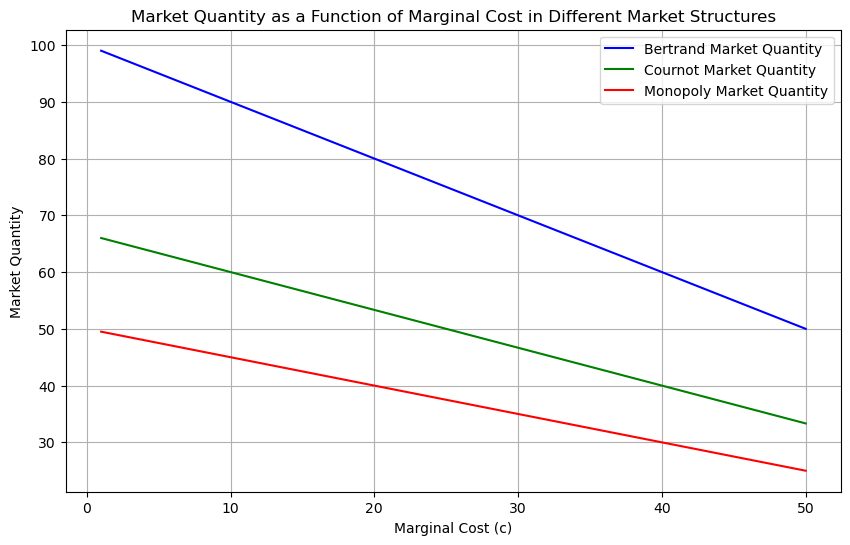

In [ ]:
# Define constants
A = 100  # Total market size
alpha = 1  # Price sensitivity of demand
c = 20   # Initial marginal cost

#The market quantity in Cournot
market_quantity_cournot = 2*(A-alpha*c)/3

#The market quantity in monopoly
market_quantity_monopoly = (A-alpha*c)/2

#The market quantity in Bertrand:
market_quantity_bertrand = (A - alpha * c)/2



#The range for the marginal cost c
c_range = np.linspace(1, 50, 100)

# Total market quantities as functions of c for Bertrand, Cournot, and Monopoly scenarios
market_quantity_cournot_func = 2 * (A - alpha * c_range) / 3
market_quantity_monopoly_func = (A - alpha * c_range) / 2
market_quantity_bertrand_func = A - alpha * c_range


# Plotting the market quantities as functions of marginal cost c
plt.figure(figsize=(10, 6))
plt.plot(c_range, market_quantity_bertrand_func, label='Bertrand Market Quantity', color='blue')
plt.plot(c_range, market_quantity_cournot_func, label='Cournot Market Quantity', color='green')
plt.plot(c_range, market_quantity_monopoly_func, label='Monopoly Market Quantity', color='red')

# Labels and legend
plt.title('Market Quantity as a Function of Marginal Cost in Different Market Structures')
plt.xlabel('Marginal Cost (c)')
plt.ylabel('Market Quantity')
plt.legend()
plt.grid(True)
plt.show()

The graph above shows, the difference between a market with Bertran, Cournot and Monopoly competition. From the graph we can see that in a Bertrand competition, the market quantity is twice the size as in a monopoly market. And we get the relationship; $X^B > X^C > X^M$.

Futhermore we notice, that the market quantity decreases as the marginal cost increases. 

We can therefore conclude, that the total ouput in equilibirum depends on which market structure we assume is present. 


## Conclusion

From our analysis we have found the analytical solution for the equilibrium in a market with cournot competition. 

By extending the model to N-firms, we showed; as numbers of firms increases, the profits decreases. If N tends towards infinity, the market converges towards perfect competition with a profit of 0. I N equals 1, there is only 1 firm, and there is monopoly. 

Furthermore, we saw that the quantity in the equilibirum depends on which market competition we assume are present. In monopoly, the quantity would be lower. In Bertrand, the quantity would be higher. 